[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


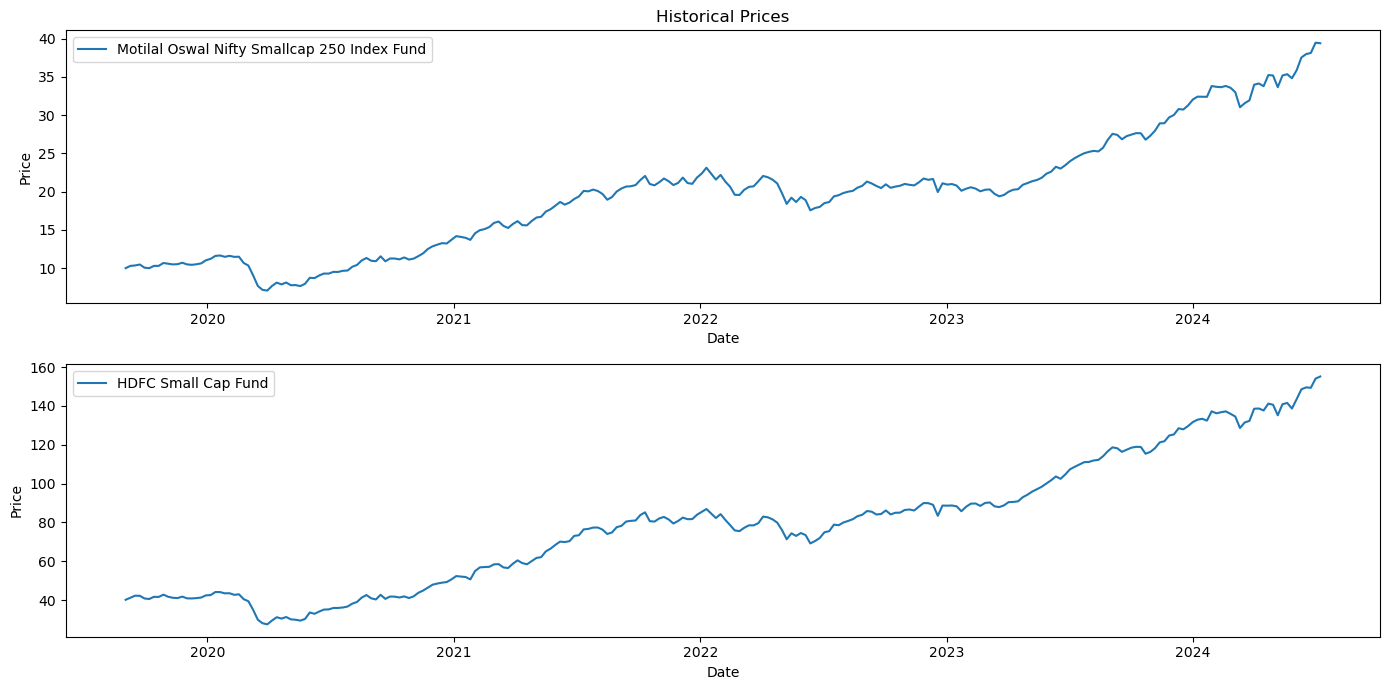

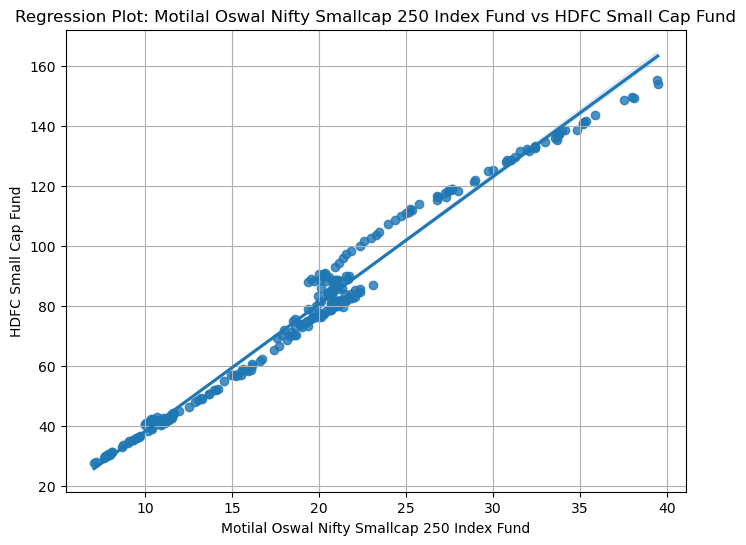

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Define tickers
smallcap_index_ticker = "0P0001IAUC.BO"
hdfc_smallcap_ticker = "0P0000XVAA.BO"

# Step 1: Data Collection
# Fetch data for the last 5 years with weekly intervals
try:
    smallcap_index_data = yf.download(smallcap_index_ticker, period="5y", interval="1wk")
    if smallcap_index_data.empty:
        raise ValueError(f"No data found for ticker {smallcap_index_ticker}")
except Exception as e:
    print(f"Failed to download Motilal Oswal Nifty Smallcap 250 Index Fund data: {e}")
    smallcap_index_data = pd.DataFrame()

try:
    hdfc_smallcap_data = yf.download(hdfc_smallcap_ticker, period="5y", interval="1wk")
    if hdfc_smallcap_data.empty:
        raise ValueError(f"No data found for ticker {hdfc_smallcap_ticker}")
except Exception as e:
    print(f"Failed to download HDFC Small Cap Fund data: {e}")
    hdfc_smallcap_data = pd.DataFrame()

# Check if both datasets are not empty
if smallcap_index_data.empty or hdfc_smallcap_data.empty:
    raise ValueError("Failed to download necessary data. Please check the ticker symbols and data availability.")

# Ensure the data has 'Date' and 'Close' columns
smallcap_index_data.reset_index(inplace=True)
hdfc_smallcap_data.reset_index(inplace=True)

# Rename the 'Close' columns for clarity
smallcap_index_data.rename(columns={'Close': 'Close_smallcap_index'}, inplace=True)
hdfc_smallcap_data.rename(columns={'Close': 'Close_hdfc_smallcap'}, inplace=True)

# Merge datasets on 'Date'
merged_df = pd.merge(smallcap_index_data[['Date', 'Close_smallcap_index']], hdfc_smallcap_data[['Date', 'Close_hdfc_smallcap']], on='Date')

# Step 2: Preprocessing
# Sort by date
merged_df = merged_df.sort_values('Date')

# Plotting historical time series of both tickers
plt.figure(figsize=(14, 7))

# Plot for Motilal Oswal Nifty Smallcap 250 Index Fund
plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['Close_smallcap_index'], label='Motilal Oswal Nifty Smallcap 250 Index Fund')
plt.title('Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot for HDFC Small Cap Fund
plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['Close_hdfc_smallcap'], label='HDFC Small Cap Fund')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Calculate and plot regression between both tickers
# Ensure the datasets align by date for regression plotting
common_dates = np.intersect1d(smallcap_index_data['Date'], hdfc_smallcap_data['Date'])

# Filter data to common dates
smallcap_index_filtered = smallcap_index_data[smallcap_index_data['Date'].isin(common_dates)]
hdfc_smallcap_filtered = hdfc_smallcap_data[hdfc_smallcap_data['Date'].isin(common_dates)]

# Plotting regression plot between both tickers
plt.figure(figsize=(8, 6))
sns.regplot(x=smallcap_index_filtered['Close_smallcap_index'], y=hdfc_smallcap_filtered['Close_hdfc_smallcap'])
plt.title('Regression Plot: Motilal Oswal Nifty Smallcap 250 Index Fund vs HDFC Small Cap Fund')
plt.xlabel('Motilal Oswal Nifty Smallcap 250 Index Fund')
plt.ylabel('HDFC Small Cap Fund')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


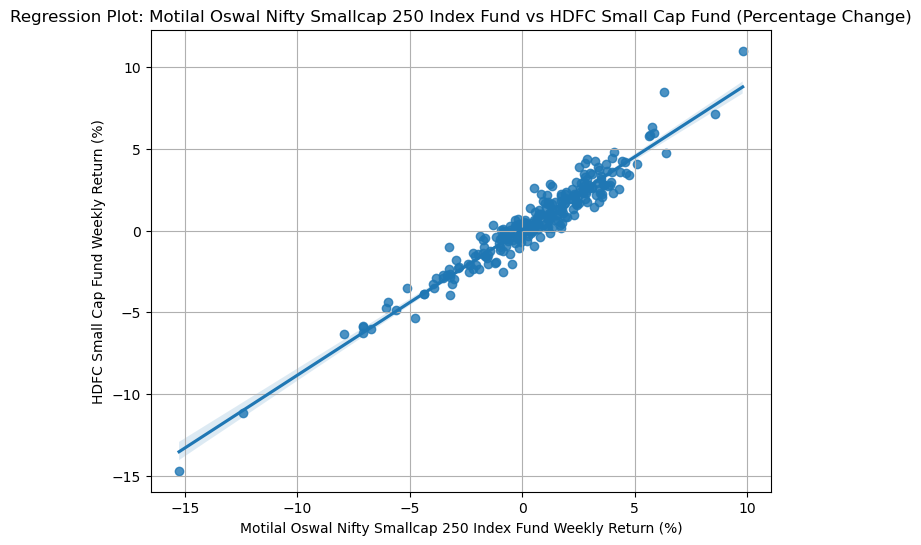

In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define tickers
smallcap_index_ticker = "0P0001IAUC.BO"
hdfc_smallcap_ticker = "0P0000XVAA.BO"

# Step 1: Data Collection
try:
    smallcap_index_data = yf.download(smallcap_index_ticker, period="5y", interval="1wk")
    if smallcap_index_data.empty:
        raise ValueError(f"No data found for ticker {smallcap_index_ticker}")
except Exception as e:
    print(f"Failed to download Motilal Oswal Nifty Smallcap 250 Index Fund data: {e}")
    smallcap_index_data = pd.DataFrame()

try:
    hdfc_smallcap_data = yf.download(hdfc_smallcap_ticker, period="5y", interval="1wk")
    if hdfc_smallcap_data.empty:
        raise ValueError(f"No data found for ticker {hdfc_smallcap_ticker}")
except Exception as e:
    print(f"Failed to download HDFC Small Cap Fund data: {e}")
    hdfc_smallcap_data = pd.DataFrame()

# Check if both datasets are not empty
if smallcap_index_data.empty or hdfc_smallcap_data.empty:
    raise ValueError("Failed to download necessary data. Please check the ticker symbols and data availability.")

# Step 2: Calculate weekly percentage change
smallcap_index_data['Weekly_Return'] = smallcap_index_data['Close'].pct_change() * 100
hdfc_smallcap_data['Weekly_Return'] = hdfc_smallcap_data['Close'].pct_change() * 100

# Drop NaN values
smallcap_index_data.dropna(inplace=True)
hdfc_smallcap_data.dropna(inplace=True)

# Merge on date
merged_df = pd.merge(smallcap_index_data[['Weekly_Return']], hdfc_smallcap_data[['Weekly_Return']], on='Date', suffixes=('_Motilal', '_HDFC'))

# Step 3: Plotting regression plot between both tickers based on percentage change
plt.figure(figsize=(8, 6))
sns.regplot(x='Weekly_Return_Motilal', y='Weekly_Return_HDFC', data=merged_df)
plt.title('Regression Plot: Motilal Oswal Nifty Smallcap 250 Index Fund vs HDFC Small Cap Fund (Percentage Change)')
plt.xlabel('Motilal Oswal Nifty Smallcap 250 Index Fund Weekly Return (%)')
plt.ylabel('HDFC Small Cap Fund Weekly Return (%)')
plt.grid(True)
plt.show()


In [78]:
# Step 1: Align datasets based on common dates
common_dates = hdfc_smallcap_data.index.intersection(benchmark_data.index)
hdfc_smallcap_data = hdfc_smallcap_data.loc[common_dates]
benchmark_data = benchmark_data.loc[common_dates]

# Step 2: Calculate weekly percentage change
hdfc_smallcap_data['Weekly_Return'] = hdfc_smallcap_data['Close'].pct_change() * 100
benchmark_data['Weekly_Return'] = benchmark_data['Close'].pct_change() * 100

# Drop NaN values
hdfc_smallcap_data.dropna(inplace=True)
benchmark_data.dropna(inplace=True)

# Step 3: Calculate beta (using regression against benchmark)
def calculate_beta(stock_returns, benchmark_returns):
    X = benchmark_returns.values.reshape(-1, 1)
    y = stock_returns.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    beta = model.coef_[0][0]
    return beta

hdfc_smallcap_beta = calculate_beta(hdfc_smallcap_data['Weekly_Return'], benchmark_data['Weekly_Return'])

# Step 4: Calculate Sharpe ratio
risk_free_rate = 0.05  # Assuming a risk-free rate of 5% annually

def calculate_sharpe_ratio(returns, risk_free_rate):
    avg_return = np.mean(returns)
    std_dev = np.std(returns)
    sharpe_ratio = (avg_return - risk_free_rate) / std_dev
    return sharpe_ratio

hdfc_smallcap_sharpe = calculate_sharpe_ratio(hdfc_smallcap_data['Weekly_Return'], risk_free_rate)

# Print out the results
print("Beta Value:")
print(f"HDFC Small Cap Fund - Beta: {hdfc_smallcap_beta}")
print("\nSharpe Ratio (assuming 5% risk-free rate):")
print(f"HDFC Small Cap Fund - Sharpe Ratio: {hdfc_smallcap_sharpe}")


Beta Value:
HDFC Small Cap Fund - Beta: 0.861755946297586

Sharpe Ratio (assuming 5% risk-free rate):
HDFC Small Cap Fund - Sharpe Ratio: 0.18726843677130914


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.1057
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0080
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epo

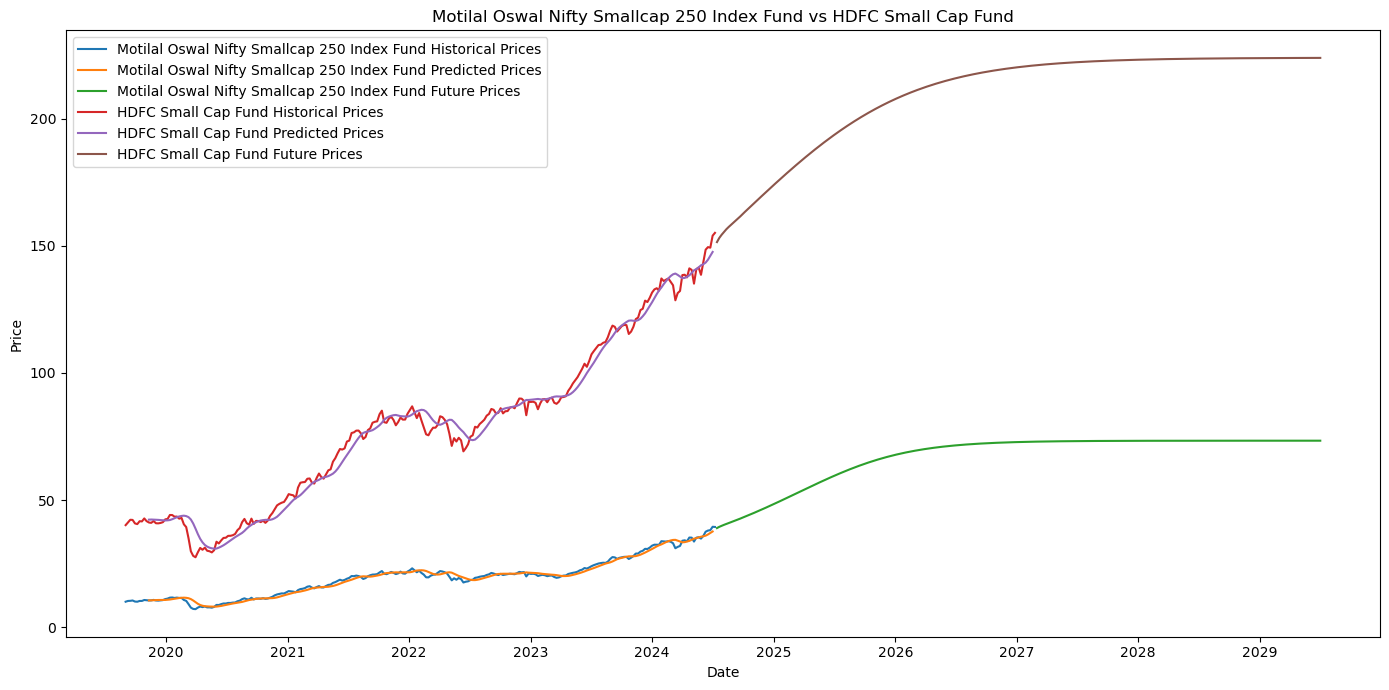

In [50]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define tickers
smallcap_index_ticker = "0P0001IAUC.BO"
hdfc_smallcap_ticker = "0P0000XVAA.BO"

# Step 1: Data Collection
# Fetch data for the last 5 years with weekly intervals
try:
    smallcap_index_data = yf.download(smallcap_index_ticker, period="5y", interval="1wk")
    if smallcap_index_data.empty:
        raise ValueError(f"No data found for ticker {smallcap_index_ticker}")
except Exception as e:
    print(f"Failed to download Motilal Oswal Nifty Smallcap 250 Index Fund data: {e}")
    smallcap_index_data = pd.DataFrame()

try:
    hdfc_smallcap_data = yf.download(hdfc_smallcap_ticker, period="5y", interval="1wk")
    if hdfc_smallcap_data.empty:
        raise ValueError(f"No data found for ticker {hdfc_smallcap_ticker}")
except Exception as e:
    print(f"Failed to download HDFC Small Cap Fund data: {e}")
    hdfc_smallcap_data = pd.DataFrame()

# Check if both datasets are not empty
if smallcap_index_data.empty or hdfc_smallcap_data.empty:
    raise ValueError("Failed to download necessary data. Please check the ticker symbols and data availability.")

# Ensure the data has 'Date' and 'Close' columns
smallcap_index_data.reset_index(inplace=True)
hdfc_smallcap_data.reset_index(inplace=True)

# Rename the 'Close' columns for clarity
smallcap_index_data.rename(columns={'Close': 'Close_smallcap_index'}, inplace=True)
hdfc_smallcap_data.rename(columns={'Close': 'Close_hdfc_smallcap'}, inplace=True)

# Merge datasets on 'Date'
merged_df = pd.merge(smallcap_index_data[['Date', 'Close_smallcap_index']], hdfc_smallcap_data[['Date', 'Close_hdfc_smallcap']], on='Date')

# Step 2: Preprocessing
# Sort by date
merged_df = merged_df.sort_values('Date')

# Normalize the data with separate scalers
scaler_smallcap_index = MinMaxScaler(feature_range=(0, 1))
scaler_hdfc_smallcap = MinMaxScaler(feature_range=(0, 1))
merged_df['Close_smallcap_index'] = scaler_smallcap_index.fit_transform(merged_df[['Close_smallcap_index']])
merged_df['Close_hdfc_smallcap'] = scaler_hdfc_smallcap.fit_transform(merged_df[['Close_hdfc_smallcap']])

# Step 3: Feature Engineering
# Calculate additional features like beta, Sharpe ratio, PE ratio, PB ratio
# For simplicity, let's assume these are calculated and stored in the DataFrame

# Step 4: Modeling
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # Weekly data with a time step of 10 weeks
smallcap_index_data = merged_df['Close_smallcap_index'].values
hdfc_smallcap_data = merged_df['Close_hdfc_smallcap'].values

smallcap_index_data = smallcap_index_data.reshape(-1, 1)
hdfc_smallcap_data = hdfc_smallcap_data.reshape(-1, 1)

smallcap_index_X, smallcap_index_y = create_dataset(smallcap_index_data, time_step)
hdfc_smallcap_X, hdfc_smallcap_y = create_dataset(hdfc_smallcap_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
smallcap_index_X = smallcap_index_X.reshape(smallcap_index_X.shape[0], smallcap_index_X.shape[1], 1)
hdfc_smallcap_X = hdfc_smallcap_X.reshape(hdfc_smallcap_X.shape[0], hdfc_smallcap_X.shape[1], 1)

# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

smallcap_index_model = build_lstm_model((time_step, 1))
hdfc_smallcap_model = build_lstm_model((time_step, 1))

# Train the models
smallcap_index_model.fit(smallcap_index_X, smallcap_index_y, epochs=50, batch_size=16, verbose=1)
hdfc_smallcap_model.fit(hdfc_smallcap_X, hdfc_smallcap_y, epochs=50, batch_size=16, verbose=1)

# Step 5: Prediction
smallcap_index_predictions = smallcap_index_model.predict(smallcap_index_X)
hdfc_smallcap_predictions = hdfc_smallcap_model.predict(hdfc_smallcap_X)

# Inverse transform to get actual prices
smallcap_index_predictions = scaler_smallcap_index.inverse_transform(smallcap_index_predictions)
hdfc_smallcap_predictions = scaler_hdfc_smallcap.inverse_transform(hdfc_smallcap_predictions)

# Step 6: Evaluation
# Calculate evaluation metrics like MSE
smallcap_index_mse = mean_squared_error(smallcap_index_y, smallcap_index_predictions)
hdfc_smallcap_mse = mean_squared_error(hdfc_smallcap_y, hdfc_smallcap_predictions)

print(f"Motilal Oswal Nifty Smallcap 250 Index Fund MSE: {smallcap_index_mse}")
print(f"HDFC Small Cap Fund MSE: {hdfc_smallcap_mse}")

# Predict future prices (for the next 5 years)
def predict_future_prices(model, data, steps, scaler):
    future_predictions = []
    current_step = data[-time_step:]
    for _ in range(steps):
        current_prediction = model.predict(current_step.reshape(1, time_step, 1))
        future_predictions.append(current_prediction[0, 0])
        current_step = np.append(current_step[1:], current_prediction)
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_steps = 5 * 52  # Assuming 52 trading weeks per year
smallcap_index_future_prices = predict_future_prices(smallcap_index_model, smallcap_index_data, future_steps, scaler_smallcap_index)
hdfc_smallcap_future_prices = predict_future_prices(hdfc_smallcap_model, hdfc_smallcap_data, future_steps, scaler_hdfc_smallcap)

# Plotting historical and predicted prices
plt.figure(figsize=(14, 7))

# Plot for Motilal Oswal Nifty Smallcap 250 Index Fund
plt.plot(merged_df['Date'], scaler_smallcap_index.inverse_transform(smallcap_index_data), label='Motilal Oswal Nifty Smallcap 250 Index Fund Historical Prices')
plt.plot(merged_df['Date'][time_step:time_step+len(smallcap_index_predictions)], smallcap_index_predictions, label='Motilal Oswal Nifty Smallcap 250 Index Fund Predicted Prices')
plt.plot(pd.date_range(start=merged_df['Date'].iloc[-1], periods=future_steps, freq='W'), smallcap_index_future_prices, label='Motilal Oswal Nifty Smallcap 250 Index Fund Future Prices')

# Plot for HDFC Small Cap Fund
plt.plot(merged_df['Date'], scaler_hdfc_smallcap.inverse_transform(hdfc_smallcap_data), label='HDFC Small Cap Fund Historical Prices')
plt.plot(merged_df['Date'][time_step:time_step+len(hdfc_smallcap_predictions)], hdfc_smallcap_predictions, label='HDFC Small Cap Fund Predicted Prices')
plt.plot(pd.date_range(start=merged_df['Date'].iloc[-1], periods=future_steps, freq='W'), hdfc_smallcap_future_prices, label='HDFC Small Cap Fund Future Prices')

plt.title('Motilal Oswal Nifty Smallcap 250 Index Fund vs HDFC Small Cap Fund')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


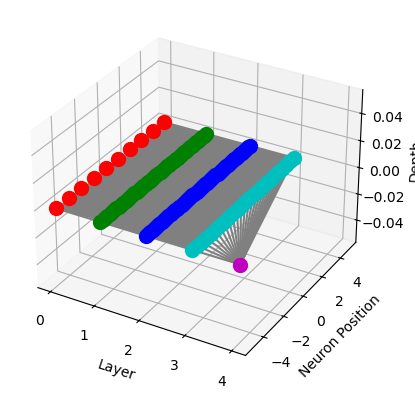

In [39]:
# 3D Neural Network Visualization
def plot_neural_network():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define the network architecture
    layers = [10, 50, 50, 25, 1]
    colors = ['r', 'g', 'b', 'c', 'm']

    # Positions of neurons in each layer
    layer_positions = [np.linspace(-5, 5, num) for num in layers]

    # Draw neurons
    for i, layer in enumerate(layer_positions):
        for j, pos in enumerate(layer):
            ax.scatter(i, pos, 0, color=colors[i], s=100)

    # Draw axons
    for i in range(len(layer_positions) - 1):
        for j, pos in enumerate(layer_positions[i]):
            for k, next_pos in enumerate(layer_positions[i + 1]):
                ax.plot([i, i + 1], [pos, next_pos], [0, 0], 'gray')

    ax.set_xlabel('Layer')
    ax.set_ylabel('Neuron Position')
    ax.set_zlabel('Depth')
    plt.show()

plot_neural_network()